<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تحلیل ماندگاری مشتری
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
       معمولاً جذب مشتری جدید برای یک شرکت امر دشوار و هزینه‌بری است زیرا که برای این کار تیم بازاریابی نیاز به استفاده از روش‌های مختلف تبلیغات و ارتباط با مشتریان دارد.
       بنابراین سعی می‌شود تا حد ممکن به حفظ مشتریان فعلی و افزایش ماندگاری آن‌ها توجه شود.
       برای تسهیل چنین کاری در گام آخر از پروژه باید نموداری رسم کنید که نمایانگر ماندگاری مشتریان شرکت باشد و به کمک تیم بازاریابی بیاید.
</font>
</p>

   
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
کتابخانه‌ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
       ابتدا کتابخانه‌های مورد نیاز خود را فرا بخوانید.
</font>
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Poumi008\AppData\Local\Temp\ipykernel_15948\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    حال داده‌های پیش‌پردازش‌شده را که در گام اول پروژه در فایل <code>preprocessed_sales.csv</code> ذخیره کردید به شکل یک دیتافریم بخوانید.
</font>
</p>

In [2]:
df = pd.read_csv("preprocessed_sales.csv")
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
def make_list(seri):
    new_list = []
    for i in seri:
        new_list.append(i)
    return new_list

In [4]:
new_df = df.copy()
new_df["time"] = pd.to_datetime(new_df["InvoiceDate"])
grouped = new_df.resample(rule = 'MS', on="time", origin='start')
out_df = grouped["CustomerId"].agg(make_list)
out_df

time
2009-12-01    [13085.0, 13085.0, 13085.0, 13085.0, 13085.0, ...
2010-01-01    [12346.0, 12346.0, 14590.0, 14590.0, 14590.0, ...
2010-02-01    [14739.0, 14739.0, 14739.0, 14739.0, 14739.0, ...
2010-03-01    [14798.0, 14798.0, 14798.0, 14798.0, 14798.0, ...
2010-04-01    [13361.0, 13361.0, 13361.0, 13361.0, 13361.0, ...
2010-05-01    [17243.0, 17243.0, 17243.0, 17243.0, 17243.0, ...
2010-06-01    [13503.0, 13503.0, 13503.0, 13503.0, 13503.0, ...
2010-07-01    [17029.0, 17029.0, 17029.0, 17029.0, 17029.0, ...
2010-08-01    [12843.0, 12843.0, 17243.0, 17243.0, 17243.0, ...
2010-09-01    [12645.0, 12645.0, 12645.0, 12645.0, 12645.0, ...
2010-10-01    [13784.0, 13784.0, 12417.0, 12417.0, 12417.0, ...
2010-11-01    [16316.0, 16316.0, 16316.0, 16316.0, 16316.0, ...
2010-12-01    [17850.0, 17850.0, 17850.0, 17850.0, 17850.0, ...
Freq: MS, Name: CustomerId, dtype: object

In [5]:
ser_new = new_df.groupby("CustomerId")["time"].min()
df2 = ser_new.reset_index(name="time")
dfff = df2.resample("M", on="time").apply(make_list)
len(dfff.iloc[1].values)

C:\Users\Poumi008\AppData\Local\Temp\ipykernel_15948\1401343170.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dfff = df2.resample("M", on="time").apply(make_list)


1

In [6]:
from numpy import NAN as NA
from itertools import chain
def calc_percent(given_list):
    new_list = []
    for i, item in enumerate(out_df):
        if item == given_list:
            index1 = i
            break
    for i in range(index1,13):
        set0 = set(list(chain.from_iterable(dfff.iloc[index1].to_list())))
        set1 = set(given_list)
        set2 = set(out_df[i])
        set3 = set0 & set1
        common_elements = set3 & set2
        percentage = (len(common_elements) / len(set3)) * 100
        new_list.append(percentage)
    lenth = len(new_list)
    for i in range(13 - lenth):
        new_list.append(NA)
    return new_list

In [12]:
out_df2 = out_df.apply(calc_percent)
pd.DataFrame(out_df2)
new_dataFrame = pd.DataFrame(out_df2.iloc[x] for x in range(13))
new_dataFrame.columns = [x for x in range(1,14)]
# new_dataFrame.index = pd.date_range(start='2009-12-1', end='2010-12-1', freq='MS').normalize()
new_dataFrame.index = ['2009-12-01', '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01', '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01', '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01']
new_dataFrame

C:\Users\Poumi008\AppData\Local\Temp\ipykernel_15948\2840271145.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  set2 = set(out_df[i])


,1,2,3,4,5,6,7,8,9,10,11,12,13
2009-12-01,100.0,35.287958,33.403141,42.513089,38.010471,35.916230,37.696335,34.240838,33.612565,36.230366,42.198953,49.528796,24.816754
2010-01-01,100.0,20.626632,31.070496,30.548303,26.370757,30.026110,25.848564,22.976501,27.937337,31.853786,30.287206,9.921671,NaN
2010-02-01,100.0,23.796791,22.459893,29.144385,24.598930,20.053476,19.251337,28.609626,25.401070,27.540107,7.219251,NaN,NaN
2010-03-01,100.0,18.961625,23.024831,24.153499,23.250564,20.316027,24.604966,30.248307,27.539503,7.900677,NaN,NaN,NaN
2010-04-01,100.0,19.387755,19.387755,16.326531,18.367347,22.448980,27.551020,26.190476,6.802721,NaN,NaN,NaN,NaN
2010-05-01,100.0,15.748031,16.929134,17.322835,17.716535,25.590551,21.259843,7.874016,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,17.407407,18.888889,20.370370,22.962963,28.518519,6.666667,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,15.591398,18.279570,29.569892,29.032258,10.215054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,20.370370,29.629630,32.098765,11.728395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,100.0,22.633745,23.456790,9.876543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    نمودار ماندگاری
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این گام از پروژه باید نموداری همچون شکل زیر رسم کنید که محور عمودی آن، نشان‌‌دهنده‌ی ماهی است که یک مشتری برای اولین‌بار با شرکت معامله داشته و محور افقی، نشان‌ می‌دهد که چند درصد مشتریان جدید در ماه‌های بعد از اولین معامله، مشتری شرکت می‌مانند و با شرکت حداقل یک فاکتور در ماه دارند.
    <br>
    به‌عنوان مثال در ماه اول (<code dir=ltr>2009-12-01</code>) از شکل زیر مشاهده می‌کنید از بین افرادی که برای نخستین بار خریدشان را در ماه <code>12</code> از سال <code>2009</code> انجام داده‌اند، ۳۵ درصد در ماه بعد هم حداقل یک معامله داشته‌اند و ۳۳ درصد نیز دو ماه بعد حداقل یک فاکتور ثبت کرده‌اند.
</font>
</p>

<div style="text-align:center;"><img src="retention_rate_b.jpg"></div>

<h3 align=right dir=rtl style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>نقشه‌ی حرارتی (Heatmap)</b>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    نقشه‌ی حرارتی را پیش از این هم در تمرین‌های قبلی کالج دیده و ترسیم کرده‌اید. با این حال، در اینجا از یک سری پارامتر دیگر آن هم استفاده خواهیم کرد.
    <br>
پارامتر <code>annot</code> مخفف کلمه‌ی <i>annotation</i> به معنی حاشیه‌نویسی است. با <code>True</code> کردن این پارامتر، مقدار خانه‌ها روی آن‌ها نمایش داده می‌شود.
<br>
همچنین پارامترهای <code>vmin</code> و <code>vmax</code>، محدوده‌ی اعدادی که تابع نگاشت رنگ روی آن‌ها نگاشت انجام می‌دهد را تعیین می‌کند. در حالت پیش‌فرض، این بازه طبق داده‌های ورودی تنظیم می‌شود اما با تنظیم مقادیر مشخص برای آن‌ها، اعدادی که خارج از بازه‌ی مشخص‌شده قرار می‌گیرند،‌ رنگی معادل
 اعداد انتهای بازه خواهند داشت.
 <br>
 

</font>
</p>

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>فرمت رشته</b>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
موضوع دیگری که در این سوال با آن مواجه می‌شوید، فرمت رشته‌ی نمایشی بر روی خانه‌های نقشه حرارتی می‌باشد.
<br>
با پارامتر <code>fmt</code> در متد <code>heatmap</code> می‌توان فرمت نمایش اعداد را مشخص کرد. این کار با استفاده از کد فرمت رشته مشخص می‌شود. کد <code>f</code> مشخص می‌کند که اعداد تا چند رقم اعشار نمایش داده شوند. برای آشنایی با دیگر کدهای فرمت رشته، 
<a href="url">این لینک</a>
ببینید.
 

</font>
</p>


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>ویژگی‌های نمودار</b>
</font>
</h3>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b style="color:#0099cc">ویژگی</b> | <b style="color:#0099cc">مقدار</b> |
| :---: | :---: |
| اندازه‌ی شکل | ۱۵ در ۸ اینچ |
| بازه اعداد برای تابع نگاشت رنگ | ۰ تا ۵۰ |
| کد فرمت مورد استفاده | <code dir=ltr>.0f</code> |
| تابع نگاشت رنگ (<code>cmap</code>) | <code>BuGn</code> |

</font>
</div>
</center>


Text(0.5, 1.0, 'Retention rates')

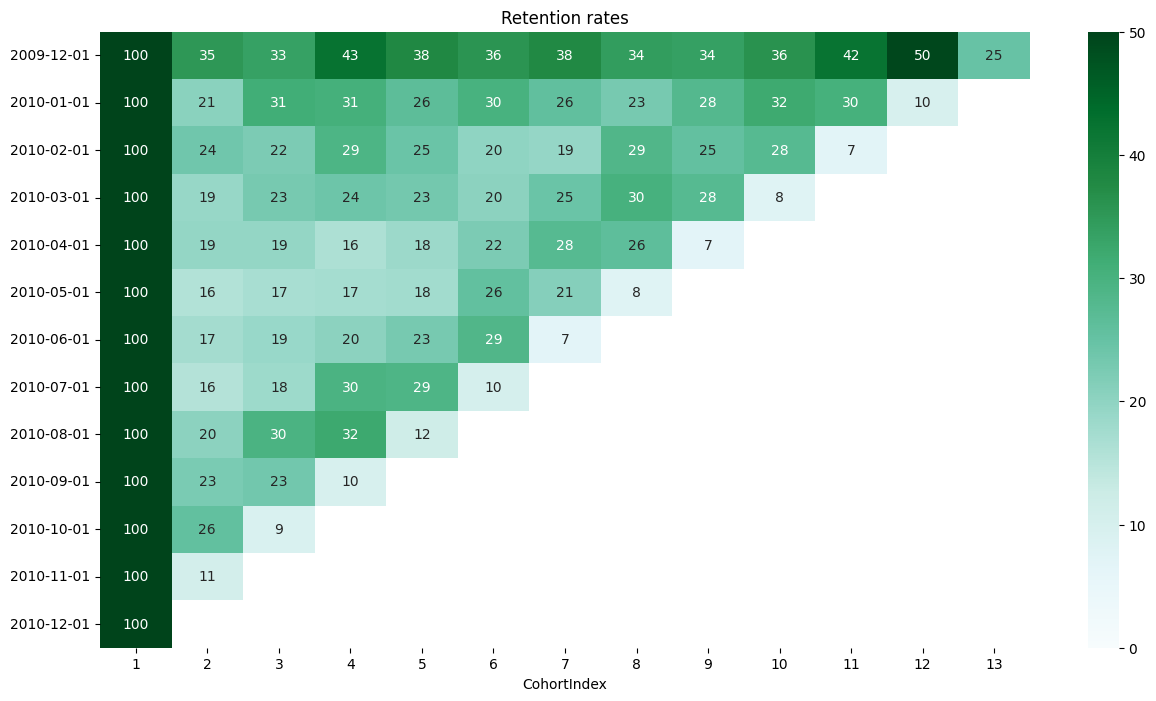

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(data=new_dataFrame, annot=True, vmin=0, vmax=50, fmt='.0f', cmap="BuGn", ax=ax)
ax.set_xlabel("CohortIndex")
ax.set_title("Retention rates")

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [18]:
import zipfile
import joblib

joblib.dump(fig,"fig")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["fig", "final_project_5_retention_rate.ipynb"]
compress(file_names)

File Paths:
['fig', 'final_project_5_retention_rate.ipynb']
